# Instructor Coding Challenge

## Part 1: Modeling Challenge

### Loading in the data and combining it with the header file provided

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
bcdf = pd.read_csv('./breast-cancer.csv', header=None)

In [3]:
field_names = open('./field_names.txt').read().splitlines()

I first created a dataframe from the CSV file, then a list of the field names from the header file, stripping away the carriage return characters so only the field names remain. 

In [4]:
bcdf.columns = field_names

I simply set the dataframe's columns equal to the list of field names, which renamed them. Now I'll move on to exploring the data and seeing what kinds of cleaning and/or transformations might be required.

In [5]:
bcdf.isna().sum()

ID                            0
diagnosis                     0
radius_mean                   0
radius_sd_error               0
radius_worst                  0
texture_mean                  0
texture_sd_error              0
texture_worst                 0
perimeter_mean                0
perimeter_sd_error            0
perimeter_worst               0
area_mean                     0
area_sd_error                 0
area_worst                    0
smoothness_mean               0
smoothness_sd_error           0
smoothness_worst              0
compactness_mean              0
compactness_sd_error          0
compactness_worst             0
concavity_mean                0
concavity_sd_error            0
concavity_worst               0
concave_points_mean           0
concave_points_sd_error       0
concave_points_worst          0
symmetry_mean                 0
symmetry_sd_error             0
symmetry_worst                0
fractal_dimension_mean        0
fractal_dimension_sd_error    0
fractal_

Looks like we don't have to worry about any missing data. But what about duplicates?

In [6]:
bcdf.duplicated().sum()

0

There don't seem to be any duplicates for any columns, even the ID column, so we know that each ID is a unique identifier for each row/person

In [7]:
bcdf.duplicated(subset='ID').sum()

0

Every variable seems to be some sort of measurement, except the diagnosis, so I'm going to make sure they all have the correct data types.

In [8]:
bcdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
ID                            569 non-null int64
diagnosis                     569 non-null object
radius_mean                   569 non-null float64
radius_sd_error               569 non-null float64
radius_worst                  569 non-null float64
texture_mean                  569 non-null float64
texture_sd_error              569 non-null float64
texture_worst                 569 non-null float64
perimeter_mean                569 non-null float64
perimeter_sd_error            569 non-null float64
perimeter_worst               569 non-null float64
area_mean                     569 non-null float64
area_sd_error                 569 non-null float64
area_worst                    569 non-null float64
smoothness_mean               569 non-null float64
smoothness_sd_error           569 non-null float64
smoothness_worst              569 non-null float64
compactness_mean              5

Indeed, it looks like everything is a float, except ID, which is an int, and diagnosis which is an object (in this case string).

In [9]:
bcdf.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

We have 357 benign tumors, and 212 malignant tumors, which is a bit unbalanced, but not too bad. Now I'm going to see if I can identify any differences between the various measurements of benign and malignant tumors, to see if any are significant. A simply groupby by the diagnosis will allow us to see the means of the rest of features. 

In [10]:
np.round(bcdf.groupby(by='diagnosis').mean().T, decimals=2)

diagnosis,B,M
ID,26543824.62,36818050.44
radius_mean,12.15,17.46
radius_sd_error,17.91,21.60
radius_worst,78.08,115.37
texture_mean,462.79,978.38
texture_sd_error,0.09,0.10
texture_worst,0.08,0.15
perimeter_mean,0.05,0.16
perimeter_sd_error,0.03,0.09
perimeter_worst,0.17,0.19


While eyeballing these averages can provide a quick overview for major differences, such as texture_mean, or concave_points_worst, it is difficult to know if the smaller differences are statistically significant. Thus, a simple 2-tailed t-test is a great place to start. In order to do that, first I'll create separate dataframes for each type of tumor to then compare the differences between the two. 

In [11]:
# creating 2 separate dataframes where the data in each is exclusive to that type of tumor
benign = bcdf[bcdf.diagnosis == "B"]
malignant = bcdf[bcdf.diagnosis == 'M']

In [ ]:
benign.drop(columns=['ID', 'diagnosis'], inplace=True)
malignant.drop(columns=['ID', 'diagnosis'], inplace=True)

Here, I am running the 2-tailed t-tests and assigninng the t-scores and the p-values to t and p, respectively

In [13]:
t, p = stats.ttest_ind(benign, malignant, equal_var=False)

To make the statistics easy to digest, I'm going to turn it into a dataframe

In [14]:
pd.DataFrame(data=[t, p], columns=benign.columns, index=['t-score', 'p-value']).T

,t-score,p-value
radius_mean,-22.208798,1.684459e-64
radius_sd_error,-11.022087,3.019055e-25
radius_worst,-22.935314,1.023141e-66
texture_mean,-19.640990,3.284366e-52
texture_sd_error,-9.297355,5.573331e-19
texture_worst,-15.818246,9.607863e-42
perimeter_mean,-20.332425,3.742121e-58
perimeter_sd_error,-24.844810,3.127316e-71
perimeter_worst,-8.112198,5.957651e-15
area_mean,0.296866,7.667216e-01


As we can see, most of the differences between the mean scores of the benign and malignant samples are statistically significant, but that is not the end of the story. Averages can be greatly skewed by outliers, so taking a look at the median values is also important. As before, I'll use a simple groupby, but this time looking at the median values of all the features by diagnosis, instead of mean. 

In [15]:
np.round(bcdf.groupby(by='diagnosis').median().T, decimals=2)

diagnosis,B,M
ID,908916.00,895366.50
radius_mean,12.20,17.33
radius_sd_error,17.39,21.46
radius_worst,78.18,114.20
texture_mean,458.40,932.00
texture_sd_error,0.09,0.10
texture_worst,0.08,0.13
perimeter_mean,0.04,0.15
perimeter_sd_error,0.02,0.09
perimeter_worst,0.17,0.19


To more easily see the values side by side, I'll combine them into one dataframe, so we can see outliers

In [20]:
# first, the dataframe for median, with distinct column names to avoid confusion
median = np.round(bcdf.groupby(by='diagnosis').median().T, decimals=2)
median.rename(columns={'B':'B-Median', 'M': 'M-Median'}, inplace=True)

# same thing as above, except for mean this time
mean = np.round(bcdf.groupby(by='diagnosis').mean().T, decimals=2)
mean.rename(columns={'B':'B-Mean', 'M': 'M-Mean'}, inplace=True)

# combining the two into 1 dataframe
diagnosisdf = pd.concat([median, mean], axis=1)

In [21]:
diagnosisdf

diagnosis,B-Median,M-Median,B-Mean,M-Mean
ID,908916.00,895366.50,26543824.62,36818050.44
radius_mean,12.20,17.33,12.15,17.46
radius_sd_error,17.39,21.46,17.91,21.60
radius_worst,78.18,114.20,78.08,115.37
texture_mean,458.40,932.00,462.79,978.38
texture_sd_error,0.09,0.10,0.09,0.10
texture_worst,0.08,0.13,0.08,0.15
perimeter_mean,0.04,0.15,0.05,0.16
perimeter_sd_error,0.02,0.09,0.03,0.09
perimeter_worst,0.17,0.19,0.17,0.19


Now it is much easier to compare the results side by side. The mean smoothness is indeed higher than the median, indicating that there are large values bringing that average up. However, with compactness, this is not the case, as the values are very close to each other. 

In [22]:
diagnosisdf.loc['compactness_mean']

diagnosis
B-Median    0.02
M-Median    0.03
B-Mean      0.02
M-Mean      0.03
Name: compactness_mean, dtype: float64

In [23]:
diagnosisdf.loc['smoothness_mean']

diagnosis
B-Median    1.85
M-Median    3.68
B-Mean      2.00
M-Mean      4.32
Name: smoothness_mean, dtype: float64

---

### Function to generate bootstrap samples of the data

In [24]:
def bootstrapper(data, sample_size, random_state):
    # First, I set a random seed, to be able to reproduce the bootstrap sampling
    np.random.seed(random_state)
    
    # Next, I use Numpy's random choice function to sample the dataframe's index
    # to the user's specified sample size
    sample = np.random.choice(data, size=sample_size)
    
    # Finally, I return the bootstrapped sample as a Numpy array
    return sample

In [25]:
bootstrapper(bcdf.diagnosis, 10, 42)

array(['B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M'], dtype=object)

This "bootstrapper" function will take in a 1-D array and randomly sample, with replacement, to the user's desired sample size. Of course, if the user wants to sample from an entire dataframe, we can use the resample function, which implements the bootstrapping procedure for sparse and dense matrices. For the sake of brevity, I kept my function simple, but if we wanted to, we could code the entire thing by hand by following and adapting its source code from: https://github.com/scikit-learn/scikit-learn/blob/1495f69242646d239d89a5713982946b8ffcf9d9/sklearn/utils/__init__.py#L226

In [26]:
from sklearn.utils import resample

In [27]:
def bootstrap2(data, size, random_state):
    bootstrap = resample(data, n_samples=size, random_state=random_state)
    return bootstrap

In [28]:
bootstrap2(bcdf, 10, 42)

,ID,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
102,862965,B,12.180,20.52,77.22,458.7,0.08013,0.04038,0.02383,0.01770,...,13.340,32.84,84.58,547.8,0.11230,0.08862,0.11450,0.07431,0.2694,0.06878
435,908489,M,13.980,19.62,91.12,599.5,0.10600,0.11330,0.11260,0.06463,...,17.040,30.80,113.90,869.3,0.16130,0.35680,0.40690,0.18270,0.3179,0.10550
270,8910721,B,14.290,16.82,90.30,632.6,0.06429,0.02675,0.00725,0.00625,...,14.910,20.65,94.44,684.6,0.08567,0.05036,0.03866,0.03333,0.2458,0.06120
106,863031,B,11.640,18.33,75.17,412.5,0.11420,0.10170,0.07070,0.03485,...,13.140,29.26,85.51,521.7,0.16880,0.26600,0.28730,0.12180,0.2806,0.09097
71,859711,B,8.888,14.64,58.79,244.0,0.09783,0.15310,0.08606,0.02872,...,9.733,15.67,62.56,284.4,0.12070,0.24360,0.14340,0.04786,0.2254,0.10840
20,8510653,B,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.03110,...,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
121,86517,M,18.660,17.12,121.40,1077.0,0.10540,0.11000,0.14570,0.08665,...,22.250,24.90,145.40,1549.0,0.15030,0.22910,0.32720,0.16740,0.2894,0.08456
466,9113455,B,13.140,20.74,85.98,536.9,0.08675,0.10890,0.10850,0.03510,...,14.800,25.46,100.90,689.1,0.13510,0.35490,0.45040,0.11810,0.2563,0.08174
214,8810955,M,14.190,23.81,92.87,610.7,0.09463,0.13060,0.11150,0.06462,...,16.860,34.85,115.00,811.3,0.15590,0.40590,0.37440,0.17720,0.4724,0.10260
330,896839,M,16.030,15.51,105.80,793.2,0.09491,0.13710,0.12040,0.07041,...,18.760,21.98,124.30,1070.0,0.14350,0.44780,0.49560,0.19810,0.3019,0.09124


---

## Exploratory Analysis and Modeling

In [29]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In order to run a logistic regression model, the endogenous (i.e. 'y' or outcome) variable must be encoded as a dummy variable (i.e. not a string, as it is now). 

In [30]:
bcdf['malignant'] = pd.get_dummies(bcdf.diagnosis)['M']

In [31]:
# setting the outcome and explanatory variables for inclusion in the model as y and X, respectively.
y = bcdf.malignant
X = bcdf.drop(columns=['diagnosis', 'ID', 'malignant'])

However, before running any models, it is often good to check for multicollinearity issues, especially since we can intuit that many of the variables measure very similar things, or are directly related to one another, meaning they would be highly collinear. This would explode the variance of some, if not all of our coefficients, affecting our ability to detect statistical significane, and potentially biasing the results. Below, I have plotted a correlation matrix of all our variables.

Text(0.5, 1, 'Correlation Matrix')

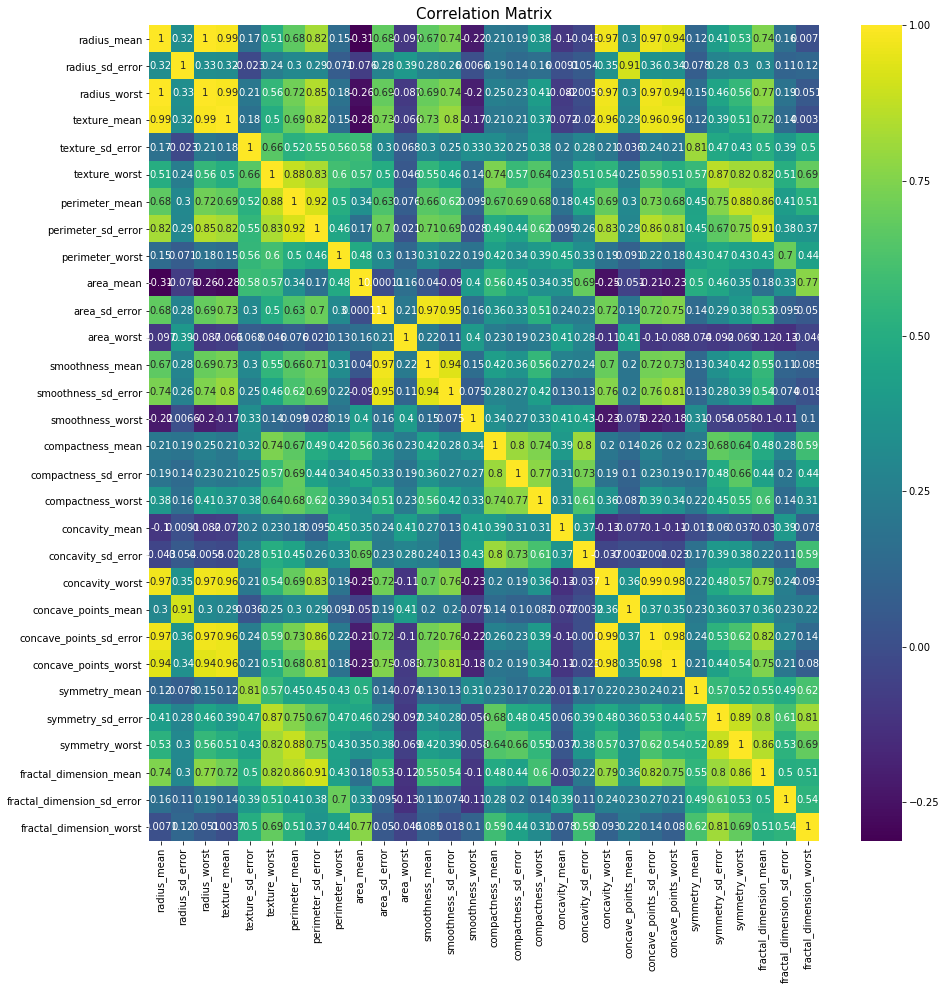

In [33]:
plt.figure(figsize=(15,15))
sns.heatmap(X.corr(), annot=True, cmap='viridis')
plt.title('Correlation Matrix', fontsize=15)

As we can see with the significant presence of yellow squares, there are several variables that are highly correlated with one another. This will likely affect our models ability to converge, and calculate statistical significance. For demonstration purposes, I will leave all the variables in the models to see what happens below, first using Statsmodels, then Sci-Kit Learn.

In [34]:
# instantiate the model
logit = sm.Logit(y, X)

In [35]:
# fit the regression
log_result = logit.fit(method='nm', maxiter=1000)

# note that, the model did not run successfully using any of the solvers/optimization algorithms, 
# because of various convergence errors, I simple chose to display the results of Nelder-Mead, to
# discuss the results

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 575
         Function evaluations: 862


In [36]:
log_result.summary()

/Users/Hovanes/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/Hovanes/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/Hovanes/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:3390: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.llf/self.llnull


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              malignant   No. Observations:                  569
Model:                          Logit   Df Residuals:                      539
Method:                           MLE   Df Model:                           29
Date:                Fri, 08 Nov 2019   Pseudo R-squ.:                     nan
Time:                        07:08:54   Log-Likelihood:                 0.0000
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
radius_mean                   -0.0447   8.76e+06   -5.1e-09      1.000   -1.72e+07    1.72e+07
radius_sd_error                0.0015   2.12e+05   7.26e-09      1.000   -4.15e+05    4.15e+05
radius_worst                   0.0363   9.01e+05   4.02e-08      1.000   -1.77e+06    1.77e+06
texture_mean                   0.0387   1.51e+05   2.56e-07      1.000   -2.96e+05    2.96e+05
texture_sd_error              -0.0086   3.29e+07  -2.61e-10      1.000   -6.44e+07    6.44e+07
texture_worst                  0.0332   4.78e+07   6.93e-10      1.000   -9.37e+07    9.37e+07
perimeter_mean                -0.0390   2.39e+07  -1.63e-09      1.000   -4.68e+07    4.68e+07
perimeter_sd_error            -0.0140   1.04e+08  -1.34e-10      1.000   -2.05e+08    2.05e+08
perimeter_worst               -0.0140   2.74e+07  -5.08e-10      1.000   -5.38e+07    5.38e+07
area_mean                      0.0101   8.98e+07   1.12e-10      1.000   -1.76e+08    1.76e+08
area_sd_error                 -0.0138   3.31e+07  -4.16e-10      1.000   -6.49e+07    6.49e+07
area_worst                    -0.0156    7.8e+05     -2e-08      1.000   -1.53e+06    1.53e+06
smoothness_mean               -0.0011   1.89e+06  -5.55e-10      1.000   -3.71e+06    3.71e+06
smoothness_sd_error            0.0043   6.12e+05   6.99e-09      1.000    -1.2e+06     1.2e+06
smoothness_worst               0.0031   1.32e+08   2.34e-11      1.000   -2.59e+08    2.59e+08
compactness_mean              -0.0033   7.35e+07  -4.44e-11      1.000   -1.44e+08    1.44e+08
compactness_sd_error          -0.0042   7.56e+07  -5.51e-11      1.000   -1.48e+08    1.48e+08
compactness_worst             -0.0018   1.48e+08  -1.25e-11      1.000   -2.91e+08    2.91e+08
concavity_mean                -0.0032   5.56e+07  -5.84e-11      1.000   -1.09e+08    1.09e+08
concavity_sd_error            -0.0068   1.71e+08  -3.99e-11      1.000   -3.35e+08    3.35e+08
concavity_worst               -0.0033   7.05e+06  -4.67e-10      1.000   -1.38e+07    1.38e+07
concave_points_mean            0.0027    2.3e+05   1.17e-08      1.000    -4.5e+05     4.5e+05
concave_points_sd_error        0.0202   3.98e+05   5.07e-08      1.000   -7.79e+05    7.79e+05
concave_points_worst           0.0449   1.46e+05   3.07e-07      1.000   -2.87e+05    2.87e+05
symmetry_mean                 -0.0095   2.51e+07  -3.79e-10      1.000   -4.91e+07    4.91e+07
symmetry_sd_error              0.0099   3.83e+07   2.59e-10      1.000   -7.51e+07    7.51e+07
symmetry_worst                -0.0061   2.01e+07  -3.04e-10      1.000   -3.93e+07    3.93e+07
fractal_dimension_mean         0.0023   3.24e+07   7.03e-11      1.000   -6.35e+07    6.35e+07
fractal_dimension_sd_error    -0.0203   1.33e+07  -1.52e-09      1.000   -2.61e+07    2.61e+07
fractal_dimension_worst       -0.0006   3.69e+07  -1.59e-11      1.000   -7.23e+07    7.23e+07
==============================================================================================

Possibly c

#### As we can see, the standard errors for all the variables are gigantic, leading to none of them being statistically significant. However, for those who don't care about inference, Sci-Kit Learn's implementation of logistic regression can automatically mitigate this, simply for the goal of classification.

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [38]:
# test-train split the data to be able to test the classification 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.5)

In [39]:
# instantiate the logistic regression model
lr = LogisticRegression(solver='liblinear')

In [40]:
# fit the model on the training data using the default parameters
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
lr.score(X_train, y_train)

0.9577464788732394

In [42]:
lr.score(X_test, y_test)

0.9403508771929825

As we can see, despite all the multicollinearity issues, the default L2 regularization addresses it by constraining the coefficient norm and keeping all the variables. In other words, it adds a 'squared magnitude' penalty term, which shrinks the magnitude of the coefficients, but doesn't completely zero them out. As a result, we get pretty decent classification results for both the training and test sets of the data. However, these scores are not the entire story. A confusion matrix helps to evaluate the model with more granularity.

In [43]:
from sklearn.metrics import confusion_matrix

In [67]:
# saving the predicted y values from the model, to compare it to the actual values in the confusion matrix
y_pred = lr.predict(X_test)

In [45]:
confusion_matrix(y_test, y_pred)

array([[174,   8],
       [  9,  94]])

In [68]:
# unraveling the confusion matrix to calculate specificity and sensitivity, which is discussed below in the markdown
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

In [47]:
spec = tn/(tn+fp)

print(f'Specificity: {round(spec,4)}')

Specificity: 0.956


In [48]:
sens = tp/(tp+fn)

print(f'Sensitivity: {round(sens,4)}')

Sensitivity: 0.9126


As mentioned before, the accuracy score of 95.8 percent isn't the entire story. Looking at the confusion matrix, we can see that there were 8 false positives and 9 false negatives, leading to specificity and sensitivity scores of 95.6% and 91.3%, respectively. Because we are dealing with possibly life-threatening situations, we would want to optimize for sensitivity, to minimize false negatives. It would be much more devastating to incorrectly miss a deal malignant tumor, rather than incorrectly diagnosing someone and making them go through extra tests and screenings out of an abundance of caution. 

To see which of the features are the most predictive of malignant tumors, we have to pull out the coefficients manually, as I demonstrate below.

In [49]:
coef_dict = {}
for coef, feat in zip(np.exp(lr.coef_[0]), X_train.columns):
    coef_dict[feat] = coef

In [50]:
coefs = pd.DataFrame(coef_dict.items(), columns=['Variables', 'Coefficients'])

In [51]:
coefs.sort_values('Coefficients', ascending = False)

,Variables,Coefficients
26,symmetry_worst,2.660027
25,symmetry_sd_error,1.986212
21,concave_points_mean,1.554729
27,fractal_dimension_mean,1.424669
6,perimeter_mean,1.416254
28,fractal_dimension_sd_error,1.360508
22,concave_points_sd_error,1.273097
5,texture_worst,1.226885
7,perimeter_sd_error,1.189227
13,smoothness_sd_error,1.158557


As we can see, symmetry_worst has the largest coefficient, with a 1-unit increase leading to more than 2.6 times the odds of a tumor being malignant. However, the data here is not standardized, so everything is not in the same units. If symmetry_worst is in nanometers and smoothness_worst is in millimeters, we would get orders of magnitude differences in coefficient sizes.  

As a robustness check, I will now explore a decision tree model to compare against the logistic regression model. 

In [52]:
# Import model.
from sklearn.tree import DecisionTreeClassifier

In [53]:
# Instantiate model.
dt = DecisionTreeClassifier(random_state=42)

In [54]:
# Fit model.
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [55]:
# Evaluate model.
print(f'Training Score: {dt.score(X_train, y_train)}')

Training Score: 1.0


In [56]:
print(f'Testing Score: {dt.score(X_test, y_test)}')

Testing Score: 0.9228070175438596


As we can see, the training score was a perfect 100%, meaning the decision tree model was very overfit. Of course this was done with the default hyperparameters, so some tuning could improve our results. However, again, accuracy isn't the entire story, so let's see the sensitivity and the specificity of the model.

In [69]:
# doing the same as for the logistic regression model, except now for the decision tree model
y_pred2 = dt.predict(X_test)

In [58]:
confusion_matrix(y_test, y_pred2)

array([[168,  14],
       [  8,  95]])

In [59]:
tn2, fp2, fn2, tp2 = confusion_matrix(y_test, y_pred2).ravel()

In [60]:
spec2 = tn2/(tn2+fp2)

print(f'Specificity: {round(spec2,4)}')

Specificity: 0.9231


In [61]:
sens2 = tp2/(tp2+fn2)

print(f'Sensitivity: {round(sens2,4)}')

Sensitivity: 0.9223


Interestingly, the specificity performed slightly worse than the logistic regression model, but the sensitivity was slightly better. Although it incorrectly identified 6 more benign tumors as malignant, it did catch 1 extra malignant tumor than the logistic regression model. Another advantage of decision trees is the ability to see feature importance, which is shown below.

In [62]:
pd.DataFrame(list((dict(zip(X.columns, dt.feature_importances_))).items()), columns=['Feature', 'Importance']).sort_values(by='Importance', ascending=False)

,Feature,Importance
27,fractal_dimension_mean,0.733927
22,concave_points_sd_error,0.137490
19,concavity_sd_error,0.042342
26,symmetry_worst,0.025807
1,radius_sd_error,0.021428
10,area_sd_error,0.014787
3,texture_mean,0.014293
24,symmetry_mean,0.009926
0,radius_mean,0.000000
17,compactness_worst,0.000000


As we can see, the most important feature for malignant tumor identification is fractal_dimension_mean (.734). The rest of the features don't even come close, and only 8 of them have any importance at all.

# Conclusion

This analysis briefly explored a dataset of images taken of malignant and benign breast cancer tumors. It started off with some basic data wrangling and descriptive statistics, including a look at the differences between benign and malignant tumors as shown through a comparison of t-tests. It then engaged in some exploratory data analysis and modeling, starting off with logistic regression and evaluations thereof, followed by a decision tree model and evaluations thereof. Overall, the logistic regression model performed better than the decision tree model, likely due to the overfitting of the latter. However, as previously mentioned, accuracy is not the entire story. Despite the overfitting, the decision tree model had a higher sensitivity score. This optimization towards minimizing false negatives caught 1 more malignant tumor than the logistic regression model. Thus, even though there would have been 6 more incorrect malignant diagnoses, that pales in comparison to what might happen if an actual malignant tumor is misclassified as benign. Also, if we had simply looked at the magnitude of the logistic regression coefficients, we would have thought that symmetry was more important, but looking at the decision tree model, we can see that the most important feature is the average fractal dimension of the tumor. 

There are several limitations of my analysis, some of which were already mentioned. One of these issues was the lack of a data dictionary, to give proper information about the units of each feature. To address this, one further step to take in the future would be to standardize the data. Another step to take in the future would be to remove the features that are causing the multicollinearity issues in the models. One method to identify the biggest offenders is to look at their Variance Inflation Factors, which is shown down below for demonstrative purposes. However, a easier place to start would be to take out all the features that were shown as having no importance in the decision tree model. Finally, both models were run with their default hyperparameters, so another step to take in the future would be to perform hyperparameter tuning through grid search to optimize the models and produce better results. 

---

### Variance Inflation Factor Analysis for Detection of Multicollinearity

In [63]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [64]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [65]:
vif.round(1)

,VIF Factor,features
0,63306.2,radius_mean
1,251.0,radius_sd_error
2,58123.6,radius_worst
3,1287.3,texture_mean
4,393.4,texture_sd_error
5,201.0,texture_worst
6,157.9,perimeter_mean
7,154.2,perimeter_sd_error
8,184.4,perimeter_worst
9,629.7,area_mean


As we can see, the worst offenders by far are the features related to a tumor's radius, followed by concavity_worst and concave_points_sd_error. 

---

---

# Part 2: Feedback

## Student Sample 1

In [ ]:
import pandas as pd
import numpy as np
from sklearn import LinearRegression
from sklearn.cross_validation import cross_val_score

The LinearRegression module is under sklearn.linear_model and cross_val_score is under sklearn.model_selection

In [ ]:
# Load data
d = pd.read_csv('../data/train.csv')

It is generally a good idea to give your dataframes more descriptive names. If you're only working with 1 dataframe, you may be tempted to do this for speed and brevity, but it's good to get in the habit now of being as descriptive as possible to avoid confusion later when you're working with multiple dataframes, which are oftentimes subsets or slices of the same data.

In [ ]:
# Setup data for prediction
x1 = data.SalaryNormalized
x2 = pd.get_dummies(data.ContractType)

You incorrectly specified the dataframe as 'data' instead of the 'd' you created above. This might have been avoided if you named it something more descriptive! Also, it is good practice to use the dataframe['column'] method of selecting columns, as this 'dataframe.column' method sometimes doesn't work when column names are capitalized, or have spaces, etc. 

Also, it doesn't really matter what name you give the variables, but technically your 'x1' is your outcome/dependent variable, which we conventionally name as 'y' -- again, be more descriptive about your naming conventions to avoid confusion later on!

Regardless, before you jump right in, it's a good idea to explore the data a little. Are all the datatypes as expected? Are there any missing data? If so, what needs to be done about it? Are there any other mistakes? Almost every dataset you work with will require some sort of data cleaning and feature engineering before you begin modeling

In [ ]:
# Setup model
model = LinearRegression()

This is technically called 'instantiating' a model and the comment above about being more descriptive about naming your dataframes applies here as well. It's good to be more descriptive, because, more often than not, you'll be working with many models, and calling them model1, model2, etc. will get confusing fast. Thus, instantiating it as 'linreg' or something along those lines would have been be

In [ ]:
# Evaluate model
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split
scores = cross_val_score(model, x2, x1, cv=1, scoring='mean_absolute_error')
print(scores.mean())

cross_val_score and train_test_split are under the model_selection module, not cross_validation, so it should have been 'from sklearn.model_selection' -- also, if you're importing from the same module, you can make your code more succinct by adding a comma after the first function/package, so you don't have to write the whole 'from sklearn.cross_validation import' all over again on a different line. On a stylistic note, it is convention to import everything at the top of your notebook/script, to not only keep things tidy, but to avoid importing the same module multiple times, as you attempted to do so here. Also, you can prevent errors when rerunning your notebook/script (e.g. if you go back and use a library/module earlier in your code than when you initially imported it, you'd get an error when rerunning the script/notebook because your import of it came later!). And again, be more descriptive about naming which model's scores these are. 

More substantively, be sure to explain your choices and results. For example, why did you choose mean absolute error and not mean squared error? Why did you only choose only one fold for your cross-validation? The most common choices are usually 3 and 5 folds. As for the printing of the scores, talk about what they mean, don't just print them out. 

Overall, this was a great attempt! Don't worry as much about the little mistakes around the imports and syntax, etc. You'll be doing this so much over the next few weeks that it'll become second nature very quickly. However, do pay more attention to developing the good habits I mentioned: descriptive naming conventions, data cleaning and exploration, and **more commenting!** Trust me, you think you'll remember exactly what was going through your mind when you look at your past code, but you won't! The more comments you leave for yourself (and your audience), the better. It may seem tedious, but your future self will thank you!

## Student Sample 2

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score

cross_val_score is under sklearn.model_selection, not cross_validation

In [ ]:
# Load data
data = pd.read_csv('../data/train.csv')

It is generally a good idea to give your dataframes more descriptive names. If you're only working with 1 dataframe, you may be tempted to do this for speed and brevity, but it's good to get in the habit now of being as descriptive as possible to avoid confusion later when you're working with multiple dataframes, which are oftentimes subsets or slices of the same data.

In [ ]:
# Setup data for prediction
y = data.SalaryNormalized
X = pd.get_dummies(data.ContractType)

Before you jump right in, it's a good idea to explore the data a little. Are all the datatypes as expected? Are there any missing data? If so, what needs to be done about it? Are there any other mistakes? Almost every dataset you work with will require some sort of data cleaning and feature engineering before you begin modeling. Also, it is good practice to use the dataframe['column'] method of selecting columns, as this dataframe.column sometimes doesn't work when column names are capitalized, or have spaces, etc.

In [ ]:
# Setup model
model = LinearRegression()

This is technically called 'instantiating' a model and the comment above about being more descriptive about naming your dataframes applies here as well. It's good to be more descriptive, because, more often than not, you'll be working with many models, and calling them model1, model2, etc. will get confusing fast. Thus, instantiating it as 'linreg' or something along those lines would have been be

In [ ]:
# Evaluate model
scores = cross_val_score(model, X, y, cv=5, scoring='mean_absolute_error')
print(scores.mean())

Always be sure to explain your choices and results. For example, why did you choose mean absolute error and not mean squared error? Why did you only choose only 5 folds for your cross-validation? As for the printing of the scores, talk about what they mean, don't just print them out, so your audience can understand your reasoning and what conclusions should be drawn from your analyses. And again, be more descriptive about naming which model's scores these are. 

Overall, this was a great attempt! Don't worry as much about the little mistakes around the imports and syntax, etc. You'll be doing this so much over the next few weeks that it'll become second nature very quickly. However, do pay more attention to developing the good habits I mentioned: descriptive naming conventions, data cleaning and exploration, and **more commenting!** Trust me, you think you'll remember exactly what was going through your mind when you look at your past code, but you won't! The more comments you leave for yourself (and your audience), the better. It may seem tedious, but your future self will thank you!